<a href="https://colab.research.google.com/github/neviim/regresionLinear/blob/master/Ataques_Adversarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [5]:
iv3 = InceptionV3()

96116736/96112376 [==============================] - 5s 0us/step


In [6]:
# este modelo esta pre-trenado 
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
from keras.preprocessing import image


In [9]:
# carrega como um formato de imagem
XI = image.load_img("./panda.jpg")

# para usar esta imagem no tensorFlow a imagem tem que ter (299 x 299)

# ou como uma matrix de valor
X = image.img_to_array(image.load_img("./tiger.jpg", target_size=(299, 299))) 

#print(X)
print(X.shape)

(299, 299, 3)


In [45]:
print(X)

[[[161. 184. 190.]
  [157. 179. 192.]
  [155. 175. 199.]
  ...
  [ 59.  83.  47.]
  [ 23.  51.   0.]
  [ 99. 129.  57.]]

 [[161. 184. 190.]
  [157. 179. 192.]
  [155. 175. 199.]
  ...
  [ 59.  83.  47.]
  [ 23.  51.   0.]
  [ 99. 129.  57.]]

 [[166. 189. 195.]
  [162. 184. 198.]
  [159. 179. 203.]
  ...
  [134. 158. 126.]
  [ 42.  69.  14.]
  [ 87. 116.  49.]]

 ...

 [[104. 137.  20.]
  [105. 142.   2.]
  [146. 188.  18.]
  ...
  [ 84. 113.   0.]
  [ 77. 107.   0.]
  [113. 144.  15.]]

 [[ 87. 116.  24.]
  [105. 141.   7.]
  [126. 170.   0.]
  ...
  [ 80. 109.   0.]
  [ 74. 103.   0.]
  [110. 140.  16.]]

 [[ 87. 116.  24.]
  [105. 141.   7.]
  [126. 170.   0.]
  ...
  [ 80. 109.   0.]
  [ 74. 103.   0.]
  [110. 140.  16.]]]


In [10]:
# print(X)
# Alterando os valores da matrix de um ranger de 0-255 para -1 a 1
X /= 255
X -= 0.5
X *= 2

print(X)

[[[-0.9607843  -0.36470586  0.10588241]
  [-0.90588236 -0.32549018  0.15294123]
  [-0.8980392  -0.31764704  0.16078436]
  ...
  [ 1.          0.96862745  0.8745098 ]
  [ 1.          1.          0.9137255 ]
  [ 0.96862745  0.9764706   0.9137255 ]]

 [[-0.90588236 -0.32549018  0.15294123]
  [-0.8666667  -0.2862745   0.19215691]
  [-0.8666667  -0.27843136  0.17647064]
  ...
  [ 1.          1.          0.92156863]
  [ 0.9843137   0.99215686  0.92941177]
  [ 0.84313726  0.88235295  0.8352941 ]]

 [[-0.84313726 -0.27843136  0.18431377]
  [-0.81960785 -0.25490195  0.20784318]
  [-0.8117647  -0.24705881  0.21568632]
  ...
  [ 0.96862745  1.          0.9607843 ]
  [ 0.85882354  0.8980392   0.8666667 ]
  [ 0.5294118   0.6         0.5921569 ]]

 ...

 [[ 0.64705884  0.7019608   0.7647059 ]
  [ 0.6627451   0.7176471   0.78039217]
  [ 0.6392157   0.69411767  0.75686276]
  ...
  [-0.6        -0.19215685  0.09803927]
  [-0.60784316 -0.19999999  0.09019613]
  [-0.62352943 -0.21568626  0.07450986]]

 [

In [11]:
# dimensao da rede neural 
print(X.shape)

(299, 299, 3)


In [12]:
X = X.reshape([1, X.shape[0], X.shape[1], X.shape[2]])

print(X.shape)

(1, 299, 299, 3)


In [13]:
Y = iv3.predict(X)

print(Y)

[[5.37046253e-05 9.50236063e-05 1.59809395e-04 1.15415591e-04
  5.55137995e-05 3.56290948e-05 4.46134836e-05 6.78796787e-05
  5.28989913e-05 3.96032701e-05 8.37111802e-05 3.62876308e-05
  3.47281202e-05 5.63036519e-05 5.13624909e-05 1.49843239e-04
  6.53054012e-05 7.19952659e-05 3.53939613e-05 6.81893653e-05
  7.30447573e-05 3.00578376e-05 7.47743979e-05 2.43199756e-05
  9.86977830e-05 8.20704518e-05 4.79314767e-05 9.02673419e-05
  1.10881520e-04 9.66855587e-05 1.07402440e-04 8.11057907e-05
  5.17176122e-05 1.15623923e-04 1.20742552e-04 8.41583969e-05
  9.93895737e-05 1.03450962e-04 7.17171861e-05 6.72394453e-05
  3.66071326e-05 4.43251010e-05 3.97343938e-05 7.07016006e-05
  7.93145955e-05 4.04451202e-05 7.01479148e-05 3.18831189e-05
  4.55308182e-05 7.52163978e-05 1.90293213e-04 7.35843132e-05
  5.74785663e-05 4.96387729e-05 2.36478772e-05 9.12940232e-05
  7.20839598e-05 7.96591266e-05 1.00945195e-04 4.56999987e-05
  2.00720955e-04 9.23355547e-05 7.04925478e-05 3.35124059e-05
  7.9432

In [14]:
decode_predictions(Y)

40960/35363 [==================================] - 0s 4us/step


[[('n02129604', 'tiger', 0.7772802),
  ('n02123159', 'tiger_cat', 0.1307001),
  ('n02127052', 'lynx', 0.0016391822),
  ('n04266014', 'space_shuttle', 0.0008742568),
  ('n04487394', 'trombone', 0.00064770784)]]

In [15]:
# Rede neural identificando imagem
X = image.img_to_array(image.load_img("./tiger.jpg", target_size=(299, 299)))

# Alterando os valores da matrix de um ranger de 0-255 para -1 a 1
X /= 255
X -= 0.5
X *= 2

X = X.reshape([1, X.shape[0], X.shape[1], X.shape[2]])

Y = iv3.predict(X)

decode_predictions(Y)


[[('n02129604', 'tiger', 0.7772802),
  ('n02123159', 'tiger_cat', 0.1307001),
  ('n02127052', 'lynx', 0.0016391822),
  ('n04266014', 'space_shuttle', 0.0008742568),
  ('n04487394', 'trombone', 0.00064770784)]]

**Ataques Adversarios**

Podemos manipular esta entrada desta rede neural

Como podemos gerar este tipo de imagem, para manipular esta rede neural

nos vamos utilizar um parametro de ajuste nos parametros dos pixel da imagem de entrada.

In [16]:
# Criando uma forma de manipular esta rede
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

# a classe limão esta clasificada com 951
target_class = 951

loss = out_layer[0, target_class]

grad = K.gradients(loss, inp_layer)[0]

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])


# criando o loop

adv = np.copy(X)


# valor de pertubação que não pode ser ultrapaçado
# esta referencia é para deixar a imagem gerada imperceptivel 
# a nos humanos.

# na manipulação do pixel não pode ultrapassar isso

pert = 0.01

max_pert = X + 0.01
min_pert = X - 0.01

# -----------------

cost = 0.0

while cost < 0.95:
  
  gr, cost = optimize_gradient([adv, 0]) # ,0 modo teste 
  
  adv += gr
  
  # os valores de saturação não pode ser maiores que estas variaveis
  
  adv = np.clip(adv, min_pert, max_pert)
  adv = np.clip(adv, -1, 1)
  
  print("Lemon cost: ", cost)
  

# tirar uma copia da variavel
hacked = np.copy(adv)


Lemon cost:  0.00021825926
Lemon cost:  0.00021934896
Lemon cost:  0.00022046144
Lemon cost:  0.00022157287
Lemon cost:  0.00022270282
Lemon cost:  0.00022384926
Lemon cost:  0.00022500561
Lemon cost:  0.00022615553
Lemon cost:  0.00022731445
Lemon cost:  0.00022849067
Lemon cost:  0.00022968718
Lemon cost:  0.00023091037
Lemon cost:  0.00023214378
Lemon cost:  0.0002333906
Lemon cost:  0.00023466891
Lemon cost:  0.00023594244
Lemon cost:  0.00023720249
Lemon cost:  0.00023847067
Lemon cost:  0.00023975264
Lemon cost:  0.00024103571
Lemon cost:  0.00024231448
Lemon cost:  0.00024360295
Lemon cost:  0.0002448924
Lemon cost:  0.00024620863
Lemon cost:  0.00024752427
Lemon cost:  0.00024883784
Lemon cost:  0.00025011704
Lemon cost:  0.00025136126
Lemon cost:  0.0002526133
Lemon cost:  0.00025388072
Lemon cost:  0.00025515078
Lemon cost:  0.00025641546
Lemon cost:  0.00025769553
Lemon cost:  0.00025898588
Lemon cost:  0.00026027908
Lemon cost:  0.00026157172
Lemon cost:  0.0002628793
Lemon

In [0]:
# para abrir o help de uma função coloque (?) apos ela. 
np.clip?

In [64]:
print(inp_layer)
print(out_layer)

Tensor("input_1:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)



A Rede chego a  **0.99630463** de equivalencia de que o tigre é um Limão


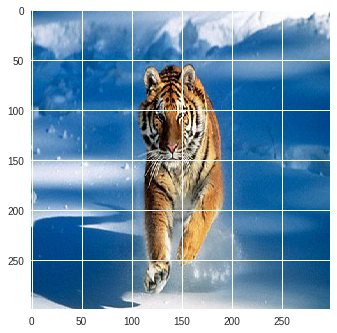

In [17]:
# reinverter os passos que foi feito antes
adv /= 2
adv += 0.5
adv *= 255

# imprime a imagem Hackeada
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [0]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("../hacked.png")

In [20]:
# executando novamente a sequencia de identificação para ver se a rede neural ira detectar nossa
# imagem do togre como sendo um limão.

# Rede neural identificando imagem
X = image.img_to_array(image.load_img("./hacked.png", target_size=(299, 299)))

# Alterando os valores da matrix de um ranger de 0-255 para -1 a 1
X /= 255
X -= 0.5
X *= 2

X = X.reshape([1, X.shape[0], X.shape[1], X.shape[2]])

Y = iv3.predict(X)

decode_predictions(Y)

[[('n07749582', 'lemon', 0.9984781),
  ('n02823750', 'beer_glass', 0.00039149993),
  ('n07932039', 'eggnog', 0.00013709957),
  ('n02129604', 'tiger', 0.0001001696),
  ('n09229709', 'bubble', 9.913164e-05)]]